In [208]:
from solution import *

import pandas as pd
import matplotlib.pyplot as plt

In [209]:
def get_test_errors2(iris):
    hs = [0.001, 0.01, 0.1, 0.3, 1.0, 3.0, 10.0, 15.0, 20.0]
    sigmas = [0.001, 0.01, 0.1, 0.3, 1.0, 3.0, 10.0, 15.0, 20.0]
    
    (training_set, validation_set, test_set) = split_dataset(iris)
    
    tr_x, tr_y = training_set[:, :-1], training_set[:, -1]
    val_x, val_y = validation_set[:, :-1], validation_set[:, -1]
    te_x, te_y = test_set[:, :-1], test_set[:, -1]
    
    er = ErrorRate(tr_x, tr_y, val_x, val_y)
    
    er_hp = np.array([er.hard_parzen(h) for h in hs])
    er_sp = np.array([er.soft_parzen(sigma) for sigma in sigmas])
    
    return hs, sigmas, er_hp, er_sp


hs, sigmas, er_hp, er_sp = get_test_errors2(iris)

## Results

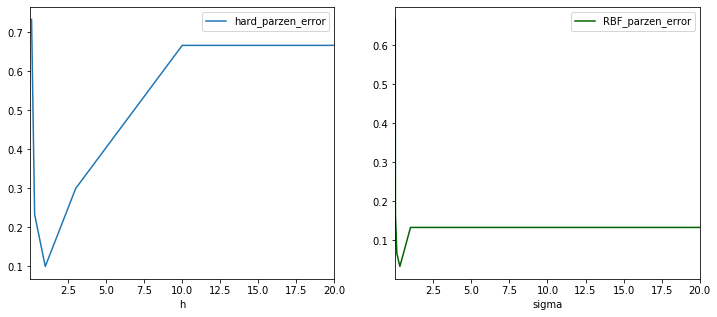

In [213]:
df_q5 = pd.DataFrame(np.array([hs, sigmas, er_hp, er_sp]).T, columns=['h', 'sigma', 'hard_parzen_error', 'RBF_parzen_error'])
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
df_q5[['h','hard_parzen_error']].plot(x='h', y='hard_parzen_error', ax=axes[0])
df_q5[['sigma','RBF_parzen_error']].plot(x='sigma', y='RBF_parzen_error', ax=axes[1], color='DarkGreen')

## Analysis

The results of Q5 are shown in above figure. It is obvious that the error rates of the two methods dropped rapaidly when their parameters were under $1$. The figures then gradually rose to $0.67$ and $0.13$, respectively. After that, both two figures maintained stably.

However, soft RBF Parzen performed much better than hard Parzen: (1) the minimal error rate for soft RBF Parzen is  $0.03$, only one-third of that of hard Parzen ($0.1$). (2) soft RBF Parzen had much better results even that it had improper parameter settings.


# Q7 

## Complexity Analysis

The complexity of those two methods are clear. 

For each test example, both two methods need to calculate the standard Euclidean distance with each sample in training data. This calculation requires $O(n d)$, where $n$ denotes the number of training examples and $d$ is the dimension of each example.

For hard Parzen, it then need to campare the distance with $h$ to filter out training examples out of the window, and it can also count the votes when meeting examples in window. So, this step requires $O(n)$. Finally, obtaining the label with most votes requires $O(m)$, where $m$ denotes the number of different classes.  Therefore, the complexity of hard Parzen for each test example is

$O(nd + n + m)$,

and it does not change when $h$ varies. This is because that this method have to calculate distances with all training examples.


However, soft RBF Parzen does not need to check whether each training example is in the window, instead it directly calculate KDE. Hence, its complexity is

$O(nd + m)$,

and it also does not change when $\sigma$ varies, as $\sigma$ only participates in the calculation of KDE.


# Q9

## Code

In [ ]:
def get_val_errors(iris, A):

    
    hs = [0.001, 0.01, 0.1, 0.3, 1.0, 3.0, 10.0, 15.0, 20.0]
    sigmas = [0.001, 0.01, 0.1, 0.3, 1.0, 3.0, 10.0, 15.0, 20.0]
    
    (training_set, validation_set, test_set) = split_dataset(iris)
    
    def project_data(data):
        projected_x = random_projections(data[:, :-1], A)
        return np.concatenate([projected_x, np.reshape(data[:, -1],[-1,1])], axis=-1)
    
    
    training_set = project_data(training_set)
    validation_set = project_data(validation_set)
    test_set = project_data(test_set)
    
    tr_x, tr_y = training_set[:, :-1], training_set[:, -1]
    val_x, val_y = validation_set[:, :-1], validation_set[:, -1]
    te_x, te_y = test_set[:, :-1], test_set[:, -1]
    
    er = ErrorRate(tr_x, tr_y, val_x, val_y)
    
    er_hp = np.array([er.hard_parzen(h) for h in hs])
    er_sp = np.array([er.soft_parzen(sigma) for sigma in sigmas])
    
    return (er_hp, er_sp)

def get_q9_data(iris):
    results = []
    for i in range(500):
        A = np.random.normal(0,1, 8).reshape([-1, 2])
        results.append(get_val_errors(iris.copy(), A))
        if i % 10 == 0 :
            print('%i of %i' % (i+1, 500), end='\r')
        
    return results

results = get_q9_data(iris)

## Results

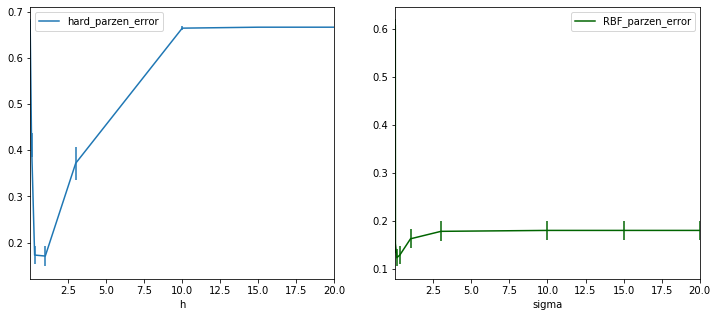

In [204]:
mean_results = np.array(results).mean(axis=0)
std_results = np.array(results).std(axis=0)
df_q9 = pd.DataFrame(np.array([hs, sigmas, mean_results[0], mean_results[1], std_results[0]*0.2, std_results[1]*0.2]).T,
                     columns=['h', 'sigma', 'hard_parzen_error', 'RBF_parzen_error', 'hard_std', 'RBF_std'])


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

df_q9[['h','hard_parzen_error', 'hard_std']].plot(x='h', y='hard_parzen_error', yerr='hard_std', ax=axes[0])
df_q9[['sigma','RBF_parzen_error', 'RBF_std']].plot(x='sigma', y='RBF_parzen_error', yerr='RBF_std', ax=axes[1], color='DarkGreen')

## Analysis

The results of Q9 are shown in the above figure.

Comparing with the figure of Q5, the average error rates of Q9 were always higher. For example, the minimal error rates for hard Parzen and soft RBF Parzen were $0.17$ and $0.12$ respectively, where the figures in Q5 were only $0.10$ and $0.03$ respectively. Therefore, the performance of random projections dropped.

However, on the other hand, the curve was clearly gentler than that of Q5, which may be more helpful to find $h^*$ or $\sigma^*$.